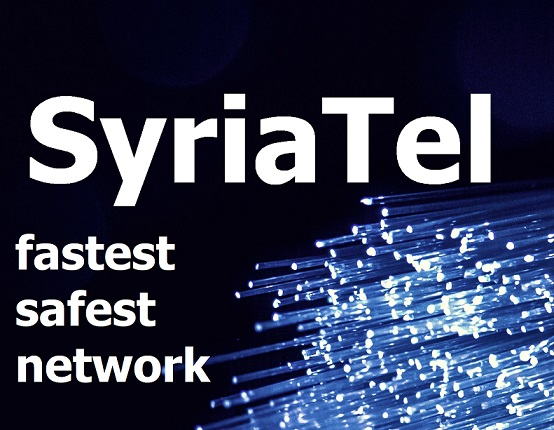

# SyriaTel Customer Churn Prediction
<br>
By Jinsol Cantrall

## ●Overview●
**SyriaTel** is expanding its business and wants to increase its customers. However, before expanding, SyriaTel wants to find out if the company could stop the customers who are canceling the subscription. With the datas that are given, is it possible to know the reason for the canceling the service and predict the churn rate(a measurement of the percentage of accounts that cancel). If so, can the company improve the service and stop customers from canceling?

## ●Business Problem●
▶ Currently, businesses want to know the churn rate. If the churn rate is high, business wants to improve on the reasons for the cancellation of the service. If the churn rate is not high, business wants to reward the loyal customers and increase its business.
<br>
<br>
① What is current churn rate? 
<br>
② What are the top 5 reasons that people are canceling?
<br>
③ What are the recommendations to improve the satisfaction?
<br>
④ Should the business focus on getting new customers?
<br>
⑤ Can the business predict customers who are staying and leaving?

## ●Data Understanding●
▶ **SyriaTel** dataset was obtained from https://www.kaggle.com/becksddf/churn-in-telecoms-dataset
<br>
▶ Dataset contained 21 columns and 3333 rows

## ●Preparing Data●

### 1. Import Dataset

In [1]:
#Importing everything
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

sns.set_palette("pastel")

In [2]:
#load dataset
df = pd.read_csv(os.path.join( "data", "Tele.csv"))

### 2. Explore Dataset

In [3]:
#general data inspection
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#looking at the columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
#looking at the numeric stats of the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
#looking at the types of each columns
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [7]:
#general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
#checking if there are any null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

***Observations:***

▶ No missing data in the dataset.
<br>
▶ Column names have spaces.
<br>
▶ Some of the columns are indicated as float even it should be numbers.
<br>
▶There are some Categorical variables.

In [9]:
#Dealing with spaces between column names
df.columns = [c.replace(' ', '_') for c in df.columns]

In [10]:
#Check if it worked
columns = df.columns.to_list()
print(columns)

['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


In [11]:
#check number of target variable
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [12]:
#Categorical Variables
print(df["state"].unique())
print(df["area_code"].unique())
print(df["international_plan"].unique())
print(df["voice_mail_plan"].unique())
print(df["customer_service_calls"].unique())

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
[415 408 510]
['no' 'yes']
['yes' 'no']
[1 0 2 3 4 5 7 9 6 8]


In [13]:
#change datatypes
df['total_day_minutes'] = df['total_day_minutes'].astype(int)
df['total_day_charge'] = df['total_day_charge'].astype(int)
df['total_eve_minutes'] = df['total_eve_minutes'].astype(int)
df['total_eve_charge'] = df['total_eve_charge'].astype(int)
df['total_night_minutes'] = df['total_night_minutes'].astype(int)
df['total_night_charge'] = df['total_night_charge'].astype(int)
df['total_intl_minutes'] = df['total_intl_minutes'].astype(int)
df['total_intl_charge'] = df['total_intl_charge'].astype(int)

In [14]:
#check if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   3333 non-null   object
 1   account_length          3333 non-null   int64 
 2   area_code               3333 non-null   int64 
 3   phone_number            3333 non-null   object
 4   international_plan      3333 non-null   object
 5   voice_mail_plan         3333 non-null   object
 6   number_vmail_messages   3333 non-null   int64 
 7   total_day_minutes       3333 non-null   int32 
 8   total_day_calls         3333 non-null   int64 
 9   total_day_charge        3333 non-null   int32 
 10  total_eve_minutes       3333 non-null   int32 
 11  total_eve_calls         3333 non-null   int64 
 12  total_eve_charge        3333 non-null   int32 
 13  total_night_minutes     3333 non-null   int32 
 14  total_night_calls       3333 non-null   int64 
 15  tota

In [15]:
#chcking missing data
df.isna().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [16]:
#checking if there are duplicates by using unique identifier 'phone number'
df['phone_number'].duplicated().sum()

0

### 3. Visualization of each categories

#### 1. Categorical Variables

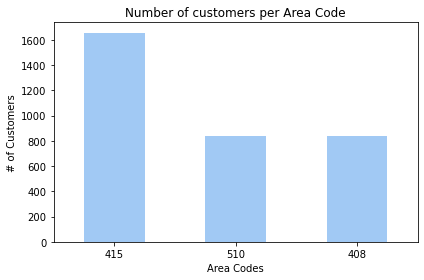

In [17]:
#Distribution of 'area_code'
df['area_code'].value_counts().plot(kind='bar', rot=0)
plt.title('Number of customers per Area Code')
plt.xlabel('Area Codes')
plt.ylabel('# of Customers')
plt.tight_layout()

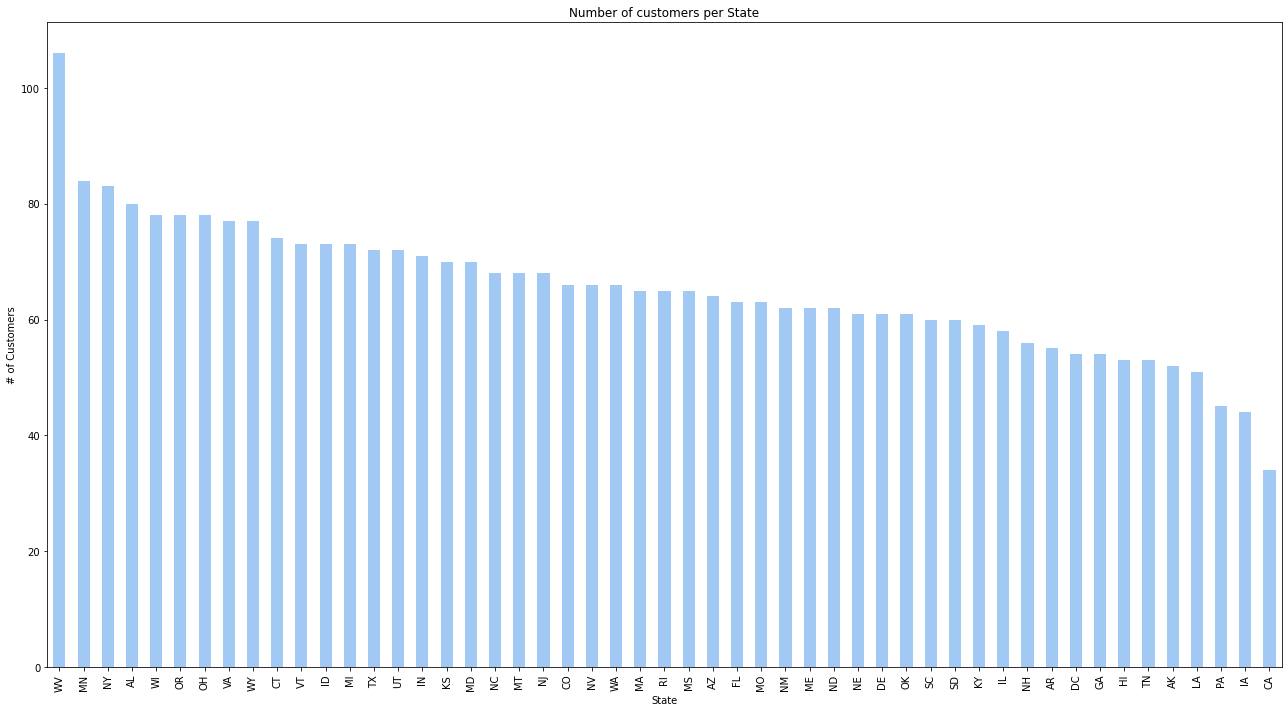

In [18]:
#Distribution of 'state'
df['state'].value_counts().plot(kind='bar', figsize=(18,10))
plt.title('Number of customers per State')
plt.xlabel('State')
plt.ylabel('# of Customers')
plt.tight_layout()

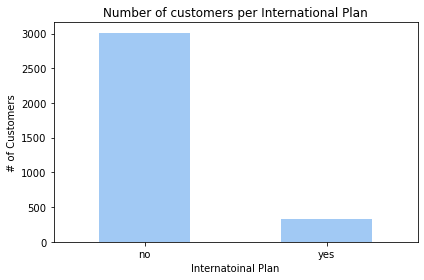

In [19]:
#Distribution of 'internatoinal_plan'
df['international_plan'].value_counts().plot(kind='bar', rot=0)
plt.title('Number of customers per International Plan')
plt.xlabel('Internatoinal Plan')
plt.ylabel('# of Customers')
plt.tight_layout()

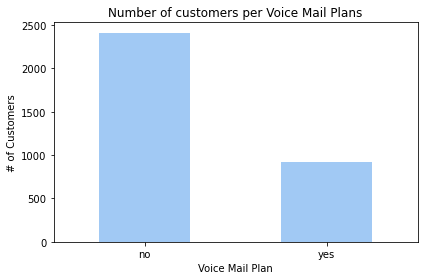

In [20]:
#Distribution of 'voice_mail_plan'
df['voice_mail_plan'].value_counts().plot(kind='bar', rot=0)
plt.title('Number of customers per Voice Mail Plans')
plt.xlabel('Voice Mail Plan')
plt.ylabel('# of Customers')
plt.tight_layout()

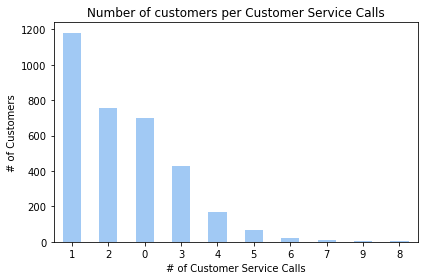

In [21]:
#Distribution of 'customer_service_calls'
df['customer_service_calls'].value_counts().plot(kind='bar', rot=0)
plt.title('Number of customers per Customer Service Calls')
plt.xlabel('# of Customer Service Calls')
plt.ylabel('# of Customers')
plt.tight_layout()

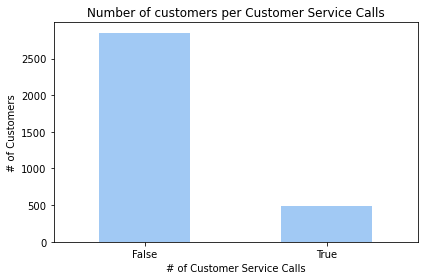

In [22]:
#Distribution of 'churn'
df['churn'].value_counts().plot(kind='bar', rot=0)
plt.title('Number of customers per Customer Service Calls')
plt.xlabel('# of Customer Service Calls')
plt.ylabel('# of Customers')
plt.tight_layout()

#### 2. Numerical Variables

In [23]:
#Making pivot colums for total minutes, calls and charges of dataset
total_minutes = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
total_calls = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls']
total_charges = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']

In [24]:
#Adding columns to df(dataset)
df['total_minutes'] = total_minutes
df['total_calls'] = total_calls
df['total_charges'] = total_charges

Text(0.5, 1.0, 'Total Minutes vs Total Charges')

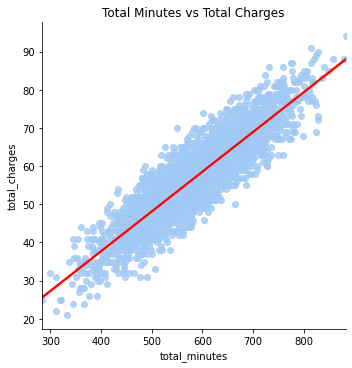

In [25]:
sns.lmplot(data=df, x='total_minutes', y='total_charges', fit_reg=True, line_kws={'color' : 'red'})
#changing color method was obtained from https://stackoverflow.com/questions/35827268/how-to-change-the-line-color-in-seaborn-lmplot/35827498
plt.title('Total Minutes vs Total Charges')

### 4. Visualization of relationship between churn and variables

In [26]:
#changing churn into numbers
df.loc[df.churn=='no', 'churn'] =0
df.loc[df.churn=='yes', 'churn'] =1

In [27]:
#generating mean value
rev = df.groupby(['churn'])['total_minutes', 'total_calls', 'total_charges'].mean()
rev

,total_minutes,total_calls,total_charges
churn,,,
False,582.715088,304.912982,56.483509
True,633.457557,306.459627,63.349896


Text(0, 0.5, 'Usage of the phone')

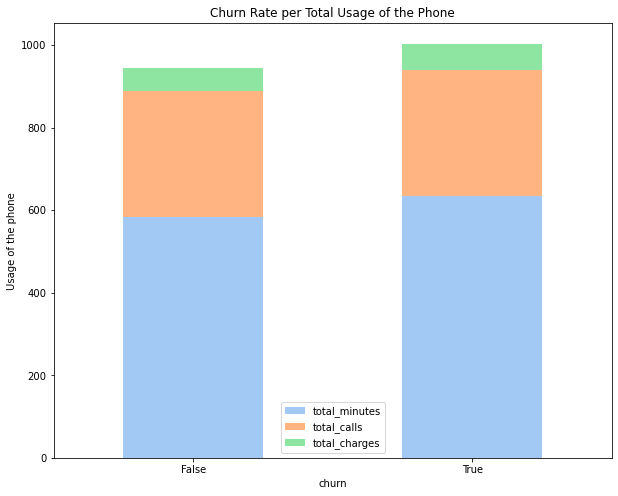

In [28]:
#plotting mean values
r = rev.plot.bar(stacked=True, figsize=(10,8), rot=0)
plt.title("Churn Rate per Total Usage of the Phone")
plt.ylabel("Usage of the phone")

▶ It seems like the higher the usage of the phone, customers more likely churn. 

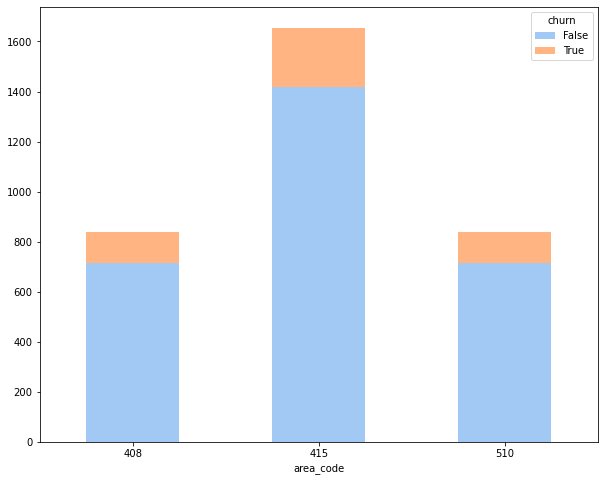

In [29]:
#churn vs area code
df.groupby(["area_code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8), rot=0)

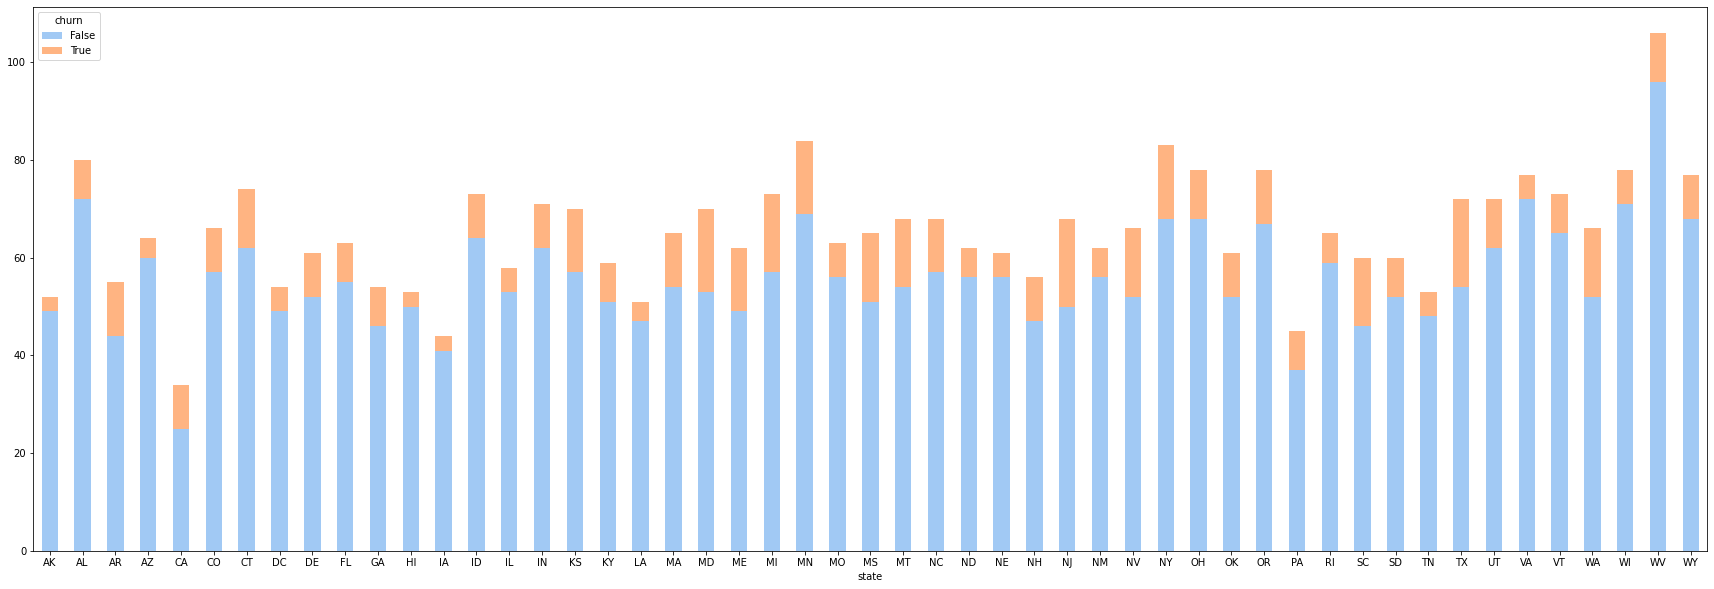

In [30]:
#churn vs state
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10), rot=0)

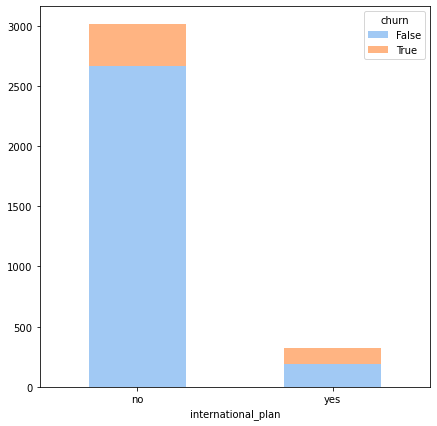

In [31]:
#churn vs international plan
df.groupby(["international_plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(7,7) ,rot=0)

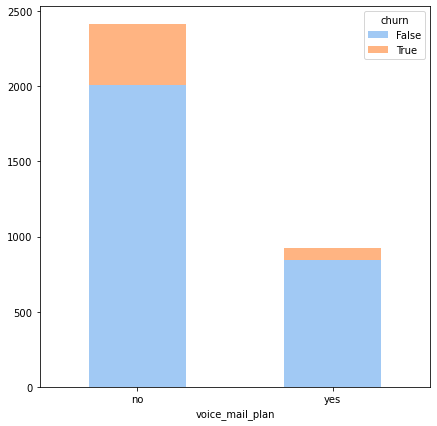

In [32]:
#churn vs voice mail plan
df.groupby(["voice_mail_plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(7,7) ,rot=0)

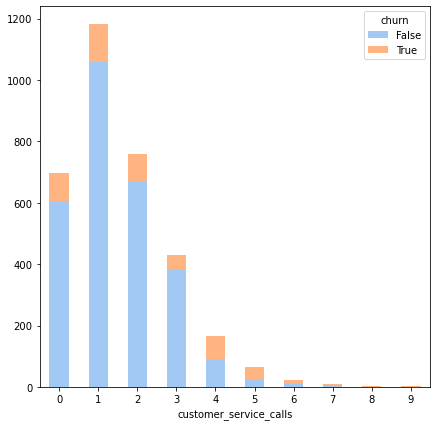

In [33]:
#churn vs customer service calls
df.groupby(["customer_service_calls", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(7,7) ,rot=0)

### 5. Cleaning Dataset

In [34]:
#checking before start the test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   3333 non-null   object
 1   account_length          3333 non-null   int64 
 2   area_code               3333 non-null   int64 
 3   phone_number            3333 non-null   object
 4   international_plan      3333 non-null   object
 5   voice_mail_plan         3333 non-null   object
 6   number_vmail_messages   3333 non-null   int64 
 7   total_day_minutes       3333 non-null   int32 
 8   total_day_calls         3333 non-null   int64 
 9   total_day_charge        3333 non-null   int32 
 10  total_eve_minutes       3333 non-null   int32 
 11  total_eve_calls         3333 non-null   int64 
 12  total_eve_charge        3333 non-null   int32 
 13  total_night_minutes     3333 non-null   int32 
 14  total_night_calls       3333 non-null   int64 
 15  tota

In [35]:
#realized area_code was considered as numerical when it was supposed to be a categorical. Changing it back so when I create pd. dummies, it works correctly.
df['area_code'] = df['area_code'].astype(str)

In [36]:
#dropping a column that was an unique identifier(phone number) and state
df.drop(['phone_number', 'state'], axis =1, inplace=True)
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_minutes,total_calls,total_charges
0,128,415,no,yes,25,265,110,45,197,99,16,244,91,11,10,3,2,1,False,716,303,74
1,107,415,no,yes,26,161,123,27,195,103,16,254,103,11,13,3,3,1,False,623,332,57
2,137,415,no,no,0,243,114,41,121,110,10,162,104,7,12,5,3,0,False,538,333,61
3,84,408,yes,no,0,299,71,50,61,88,5,196,89,8,6,7,1,2,False,562,255,64
4,75,415,yes,no,0,166,113,28,148,122,12,186,121,8,10,3,2,3,False,510,359,50


### 6. Modeling

In [37]:
#chaging target variables as number
labelencoder = LabelEncoder()
df['churn'] = labelencoder.fit_transform(df['churn'])

In [38]:
#create and set features
X = df.drop(columns= 'churn', axis=1)
y = df['churn']

In [39]:
#creating dummies for categorical variables that are in the X
X = pd.get_dummies(X)
X.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_minutes,total_calls,total_charges,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,265,110,45,197,99,16,244,91,11,10,3,2,1,716,303,74,0,1,0,1,0,0,1
1,107,26,161,123,27,195,103,16,254,103,11,13,3,3,1,623,332,57,0,1,0,1,0,0,1
2,137,0,243,114,41,121,110,10,162,104,7,12,5,3,0,538,333,61,0,1,0,1,0,1,0
3,84,0,299,71,50,61,88,5,196,89,8,6,7,1,2,562,255,64,1,0,0,0,1,1,0
4,75,0,166,113,28,148,122,12,186,121,8,10,3,2,3,510,359,50,0,1,0,0,1,1,0


In [40]:
#checking the columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   account_length          3333 non-null   int64
 1   number_vmail_messages   3333 non-null   int64
 2   total_day_minutes       3333 non-null   int32
 3   total_day_calls         3333 non-null   int64
 4   total_day_charge        3333 non-null   int32
 5   total_eve_minutes       3333 non-null   int32
 6   total_eve_calls         3333 non-null   int64
 7   total_eve_charge        3333 non-null   int32
 8   total_night_minutes     3333 non-null   int32
 9   total_night_calls       3333 non-null   int64
 10  total_night_charge      3333 non-null   int32
 11  total_intl_minutes      3333 non-null   int32
 12  total_intl_calls        3333 non-null   int64
 13  total_intl_charge       3333 non-null   int32
 14  customer_service_calls  3333 non-null   int64
 15  total_minutes        

In [41]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

used creating method from https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html

### Model1 ▶ Gaussian Naive Bayes

In [42]:
#assigining StandardScaler and GaussianNB
standardscaler = StandardScaler()
gnb = GaussianNB()

In [43]:
#Creating Pipeline
GNB = Pipeline([('standardscaler', StandardScaler()), ('gnb', GaussianNB())])

In [44]:
#fitting the model
GNB.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('gnb', GaussianNB())])

In [45]:
#Checking on the accuracy
GNB.score(X_test, y_test)

0.881559220389805

In [46]:
#cross validating the score (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
cross_val_score(GNB, X, y, scoring='f1_micro')

array([0.87256372, 0.85007496, 0.89505247, 0.89189189, 0.87837838])

In [47]:
#creating prediction and scores
GNB_Pred = GNB.predict(X_test)
f1_score(y_test, GNB_Pred)

0.6359447004608296

f1 score seems low so got help from stackoverflow 
https://stackoverflow.com/questions/8284456/f1-smaller-than-both-precision-and-recall-in-scikit-learn and
https://github.com/scikit-learn/scikit-learn/issues/83
it mentioned that f1 score needs to be assign to use micro/macro. When i checked signature, average was assigned as 'binary'.

In [48]:
#checking on the classifiaction report
print(classification_report(y_test, GNB_Pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       566
           1       0.59      0.68      0.64       101

    accuracy                           0.88       667
   macro avg       0.77      0.80      0.78       667
weighted avg       0.89      0.88      0.88       667



In [49]:
#creating prediction and scores
GNB_Pred = GNB.predict(X_test)
f1_score(y_test, GNB_Pred, average='micro')

0.8815592203898052

Text(0.5, 1.0, 'GNB Classification')

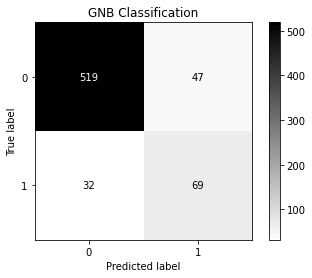

In [50]:
#creating confusion matrix
plot_confusion_matrix(GNB, X_test, y_test, cmap='binary')
plt.title('GNB Classification')

***Evaluation of the model***

▶ Accuracy of this model is 0.88 (88%)
<br>
▶ Cross validation score was 0.87 (87%)
<br>
▶ f1 score was 0.88 (88%)
<br>
<br>
***Confusion Matrix of Gaussian Naive Bayes***
<br>
▶ Accuracy 0.88 (TP+TN/TP+TN+FP+FN) 
<br>
▶ Precision 0.94 (TP/TP+FP)
<br>
▶ Recall 0.89 (TP/TP+FN)
<br>
<br>
▶ 0 = False(staying customers), 1 = True (leaving/churn customers)
<br>
<br>
▶ Predicted that 652 customers are staying and it is true.(True Positive)
<br>
▶ Predicted that 81 customers are going to churn and it is true. (True Negative)
<br>
▶ Predicted that 57 customers are staying but it is false.(False Negative)
<br>
▶ Predicted that 44 customers are leaving but it is false. (False Positive)
<br>

Accuracy = From all positive and negatives, how many  of them have we predicted correctly.
<br>
Precision = From all the positive predictions, how many are actually positive
<br>
Recall = From all the positive, how many did we predict correctly.
<br>
f1score = A measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive. (wikipedia)

### Model2 ▶ K Nearest Neighbors Classifier

In [51]:
#assiging KNegiborsClassifier
knn = KNeighborsClassifier()

In [52]:
#Creating Pipeline
KNN = Pipeline([('standardscaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [53]:
#Fitting the model
KNN.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('knn', KNeighborsClassifier())])

In [54]:
#checking on the accuracy
KNN.score(X_test, y_test)

0.8770614692653673

In [55]:
#cross validating the score (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
cross_val_score(KNN, X, y, scoring='f1_micro')

array([0.88005997, 0.88155922, 0.88905547, 0.87537538, 0.8963964 ])

In [56]:
#creating prediction and scores
KNN_Pred = KNN.predict(X_test)
f1_score(y_test, KNN_Pred, average='micro')

0.8770614692653673

In [57]:
print(classification_report(y_test, KNN_Pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       566
           1       0.77      0.27      0.40       101

    accuracy                           0.88       667
   macro avg       0.83      0.63      0.66       667
weighted avg       0.87      0.88      0.85       667



Text(0.5, 1.0, 'KNN Classification')

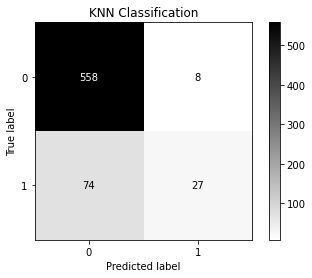

In [58]:
#creating confusion matrix
plot_confusion_matrix(KNN, X_test, y_test, cmap='binary')
plt.title('KNN Classification')

***Evaluation of the model***
<br>
▶ Accuracy of this model is 0.88 (88%)
<br>
▶ Cross validation score was 0.88 (88%)
<br>
▶ f1 score was 0.88 (88%)
<br>
<br>
***Confusion Matrix of Gaussian Naive Bayes***
<br>
▶ Accuracy 0.84 (TP+TN/TP+TN+FP+FN) 
<br>
▶ Precision 0.88 (TP/TP+FP)
<br>
▶ Recall 0.99 (TP/TP+FN)
<br>
▶ 0 = False(staying customers), 1 = True (leaving/churn customers)
<br>
<br>
▶ Predicted that 699 customers are staying and it is true.(True Positive)
<br>
▶ Predicted that 32 customers are going to churn and it is true. (True Negative)
<br>
▶ Predicted that 10 customers are staying but it is false.(False Negative)
<br>
▶ Predicted that 93 customers are leaving but it is false. (False Positive)
<br>

### Model3 ▶ Random Forest Classifier

In [59]:
#Assigning Random Forest Classifier
rfc = RandomForestClassifier()

In [60]:
#Creating Pipeline
RFC = Pipeline([('standardscaler', StandardScaler()), ('rfc', RandomForestClassifier())])

In [61]:
#Fitting the model
RFC.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('rfc', RandomForestClassifier())])

In [62]:
#checking on the accuracy
RFC.score(X_test, y_test)

0.967016491754123

In [63]:
#cross validating the score 
cross_val_score(RFC, X, y, scoring='f1_micro')

array([0.97151424, 0.96101949, 0.97601199, 0.96846847, 0.96996997])

In [64]:
#creating prediction and scores
RFC_Pred = RFC.predict(X_test)
f1_score(y_test, RFC_Pred, average='micro')

0.967016491754123

In [65]:
print(classification_report(y_test, RFC_Pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       566
           1       0.98      0.80      0.88       101

    accuracy                           0.97       667
   macro avg       0.97      0.90      0.93       667
weighted avg       0.97      0.97      0.97       667



Text(0.5, 1.0, 'RFC Classification')

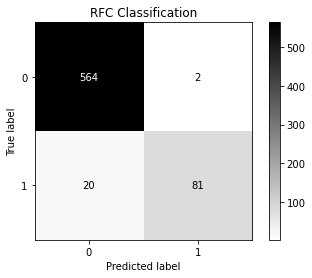

In [66]:
#creating confusion matrix
plot_confusion_matrix(RFC, X_test, y_test, cmap='binary')
plt.title('RFC Classification')

***Evaluation of the model***
<br>
▶ Accuracy of this model is 0.97 (97%)
<br>
▶ Cross validation score was 0.97 (97%)
<br>
▶ f1 score was 0.97 (97%)
<br>
<br>
***Confusion Matrix of Gaussian Naive Bayes***
<br>
▶ Accuracy 0.97 (TP+TN/TP+TN+FP+FN) 
<br>
▶ Precision 0.97 (TP/TP+FP)
<br>
▶ Recall 0.996 (TP/TP+FN)
<br>
▶ 0 = False(staying customers), 1 = True (leaving/churn customers)
<br>
<br>
▶ Predicted that 706 customers are staying and it is true.(True Positive)
<br>
▶ Predicted that 102 customers are going to churn and it is true. (True Negative)
<br>
▶ Predicted that 3 customers are staying but it is false.(False Negative)
<br>
▶ Predicted that 23 customers are leaving but it is false. (False Positive)
<br>

After three of the model, accuracy, precisions, and recall has been improving. Before selecting best fit model, I would like to try one more classification.

### Model4 ▶ Logistic Regression

In [67]:
#Assigning Logistic Regression
lr = LogisticRegression()

In [68]:
#Creating Pipeline
LR = Pipeline([('standardscaler', StandardScaler()), ('lr', LogisticRegression())])

In [69]:
#Fitting the model
LR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lr', LogisticRegression())])

In [70]:
#checking on the accuracy
LR.score(X_test, y_test)

0.8545727136431784

In [71]:
#cross validating the score 
cross_val_score(LR, X, y, scoring='f1_micro')

array([0.86506747, 0.86206897, 0.85157421, 0.86486486, 0.86336336])

In [72]:
#creating prediction and scores
LR_Pred = LR.predict(X_test)
f1_score(y_test, LR_Pred, average='micro')

0.8545727136431784

In [73]:
print(classification_report(y_test, LR_Pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.56      0.18      0.27       101

    accuracy                           0.85       667
   macro avg       0.72      0.58      0.59       667
weighted avg       0.82      0.85      0.82       667



Text(0.5, 1.0, 'LR Classification')

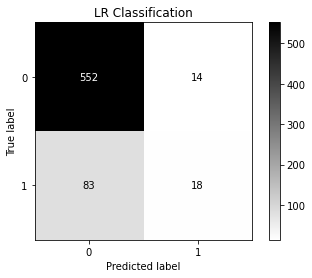

In [74]:
#creating confusion matrix
plot_confusion_matrix(LR, X_test, y_test, cmap='binary')
plt.title('LR Classification')

***Evaluation of the model***
<br>
▶ Accuracy of this model is 0.85 (85%)
<br>
▶ Cross validation score was 0.87 (87%)
<br>
▶ f1 score was 0.85 (85%)
<br>
<br>
***Confusion Matrix of Gaussian Naive Bayes***
<br>
▶ Accuracy 0.82 (TP+TN/TP+TN+FP+FN) 
<br>
▶ Precision 0.87 (TP/TP+FP)
<br>
▶ Recall 0.85 (TP/TP+FN)
<br>
▶ 0 = False(staying customers), 1 = True (leaving/churn customers)
<br>
<br>
▶ Predicted that 552 customers are staying and it is true.(True Positive)
<br>
▶ Predicted that 18 customers are going to churn and it is true. (True Negative)
<br>
▶ Predicted that 14 customers are staying but it is false.(False Negative)
<br>
▶ Predicted that 83 customers are leaving but it is false. (False Positive)
<br>

From all four models, **Random Forest Classifier** was the best fitting model with highest Accuracy, Precision, Recall, and F1 scores.

### 7. Selecting Best Model

In [75]:
#creating the best model
bestmodel = RandomForestClassifier(criterion='gini') 
bestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
#using Feature importnace to see the features
bestmodel.feature_importances_

array([0.02477753, 0.0356378 , 0.07453451, 0.02427185, 0.05046678,
       0.0305816 , 0.02123815, 0.0194573 , 0.02591333, 0.02391305,
       0.01331149, 0.04174653, 0.04743731, 0.01110373, 0.13149801,
       0.07797914, 0.02348566, 0.1784464 , 0.00297382, 0.0030646 ,
       0.00381223, 0.05010811, 0.03679504, 0.02989288, 0.01755316])

In [77]:
#Creating best model Features and coeff 
bm = pd.DataFrame({'Features':X.columns, 'coeff':bestmodel.feature_importances_})

In [78]:
#sorting coeff so it can be ranked 
final_model = bm.sort_values(by='coeff', ascending=False)

In [79]:
print(final_model)

                  Features     coeff
17           total_charges  0.178446
14  customer_service_calls  0.131498
15           total_minutes  0.077979
2        total_day_minutes  0.074535
4         total_day_charge  0.050467
21   international_plan_no  0.050108
12        total_intl_calls  0.047437
11      total_intl_minutes  0.041747
22  international_plan_yes  0.036795
1    number_vmail_messages  0.035638
5        total_eve_minutes  0.030582
23      voice_mail_plan_no  0.029893
8      total_night_minutes  0.025913
0           account_length  0.024778
3          total_day_calls  0.024272
9        total_night_calls  0.023913
16             total_calls  0.023486
6          total_eve_calls  0.021238
7         total_eve_charge  0.019457
24     voice_mail_plan_yes  0.017553
10      total_night_charge  0.013311
13       total_intl_charge  0.011104
20           area_code_510  0.003812
19           area_code_415  0.003065
18           area_code_408  0.002974


<BarContainer object of 25 artists>

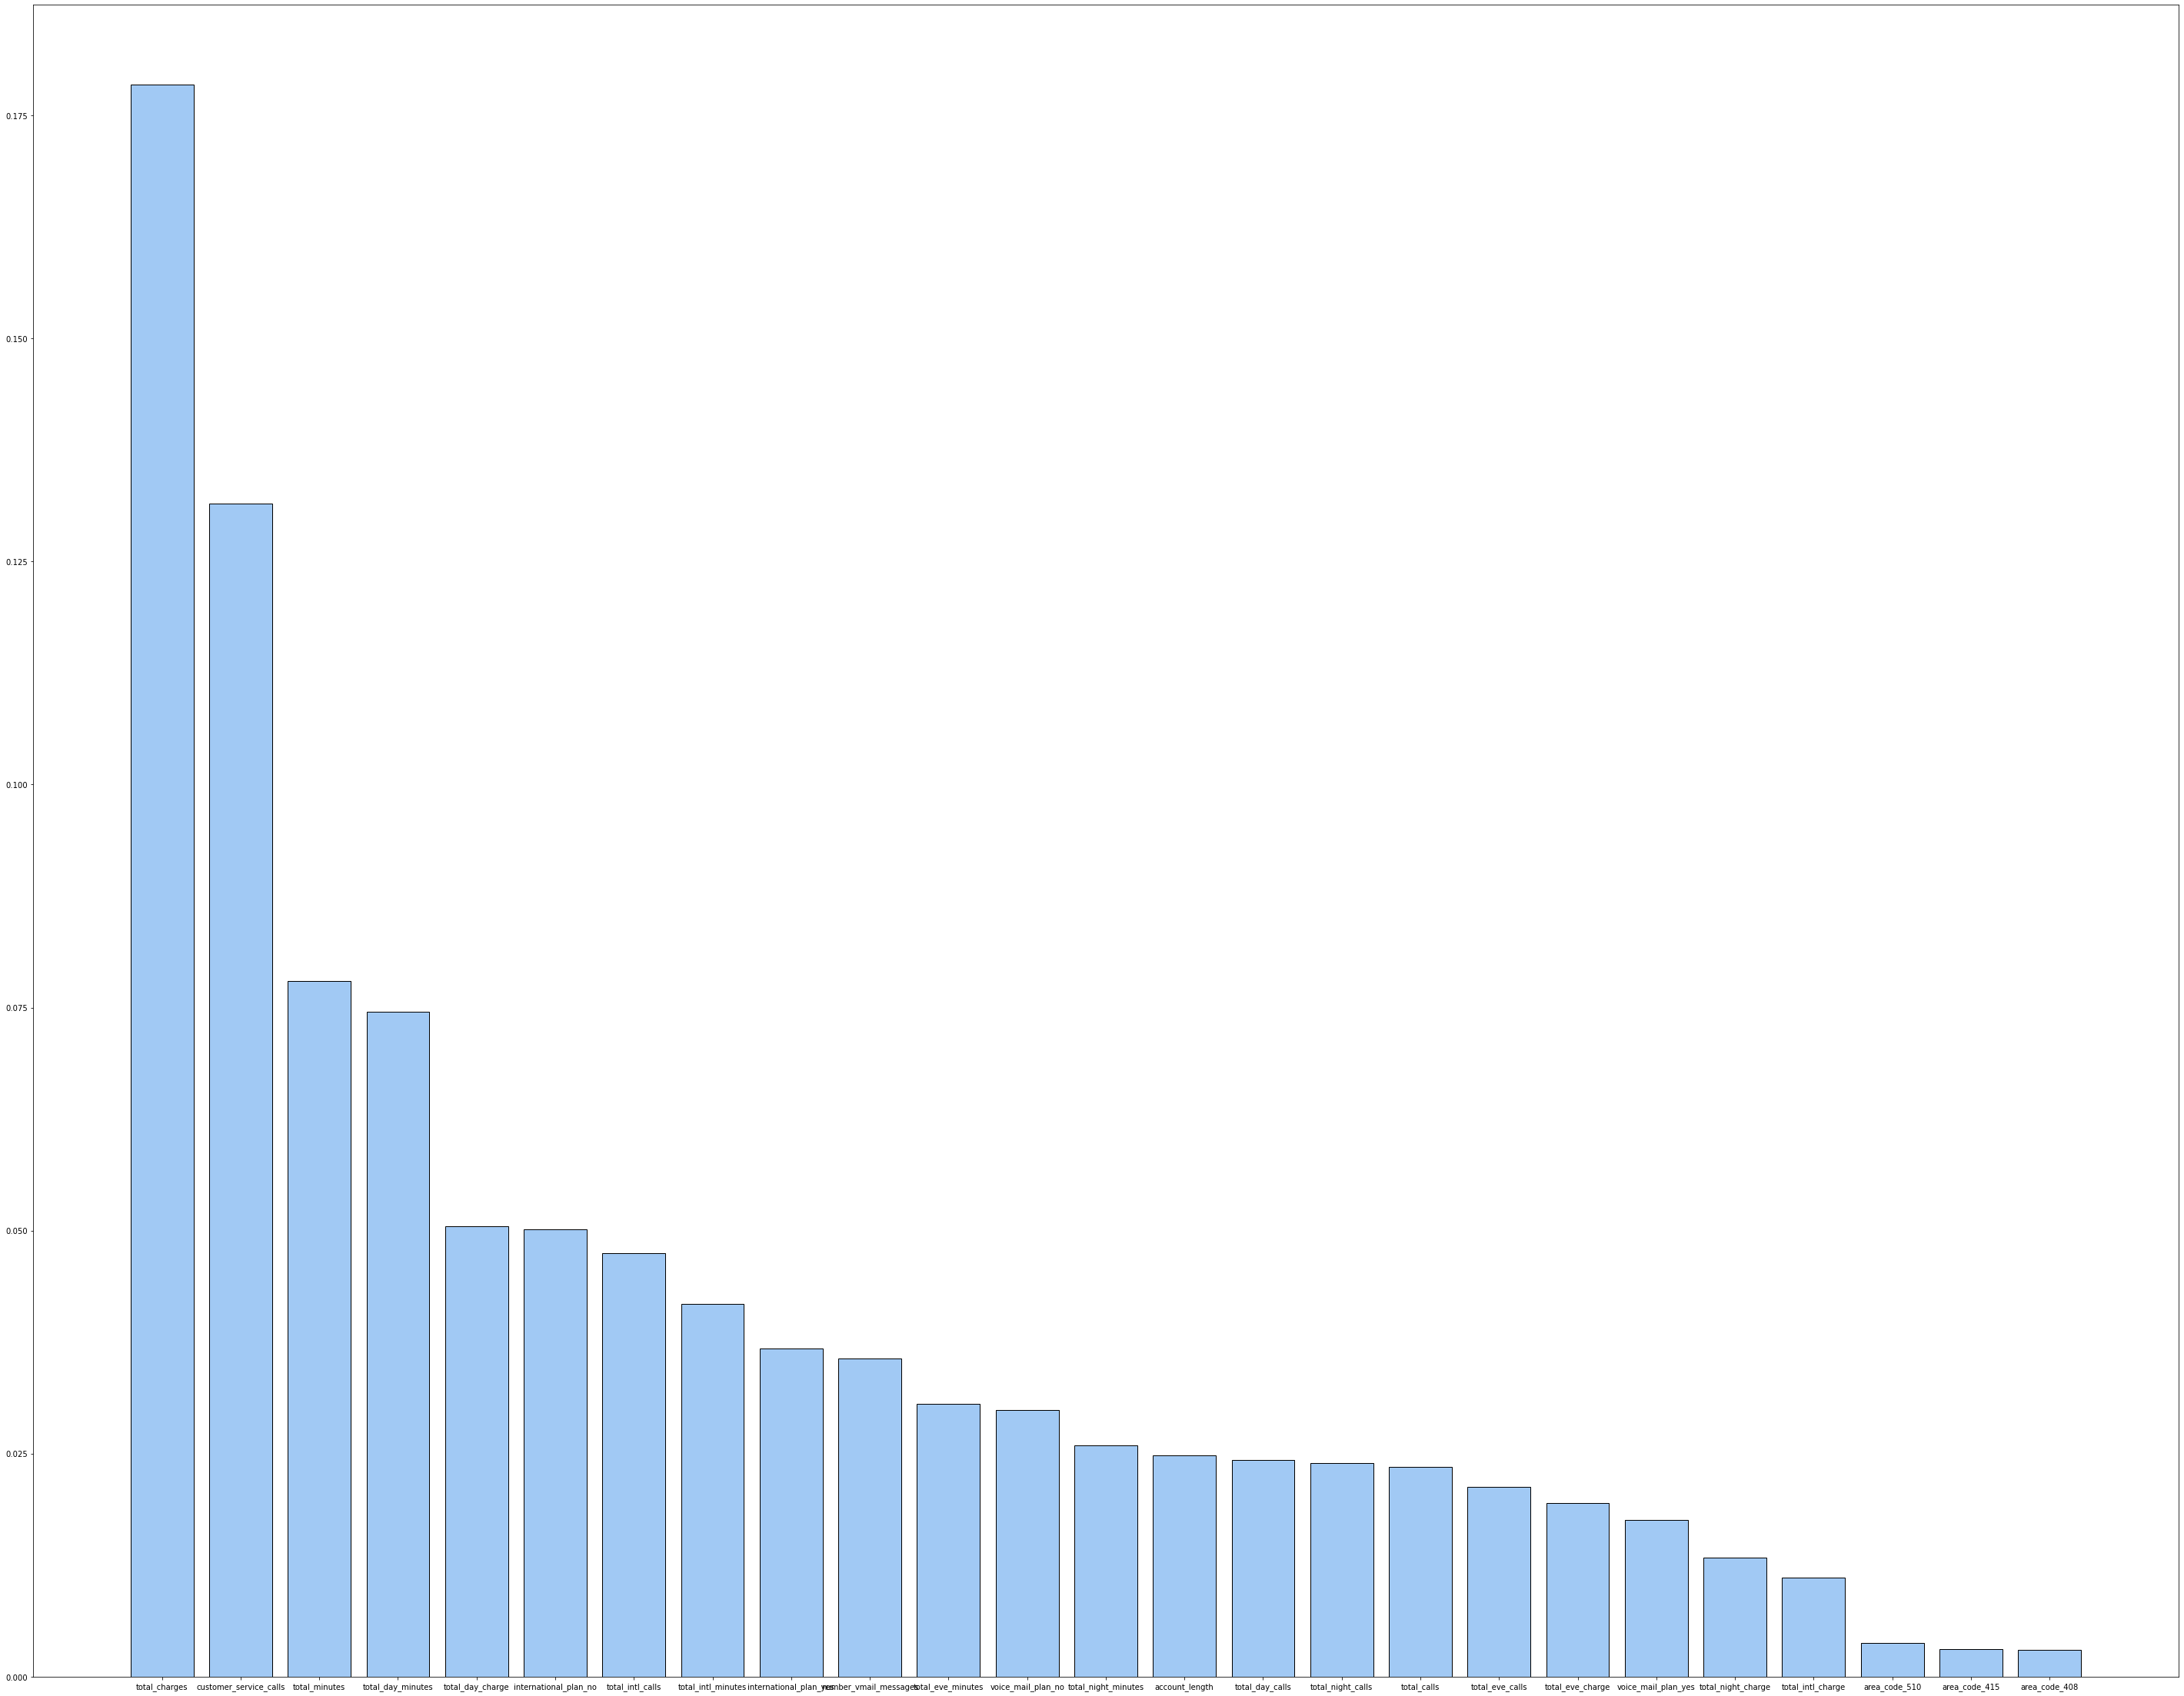

In [80]:
#creating visualization
plt.figure(figsize=(50,40))
plt.bar(final_model['Features'], final_model['coeff'], edgecolor='black')

<BarContainer object of 10 artists>

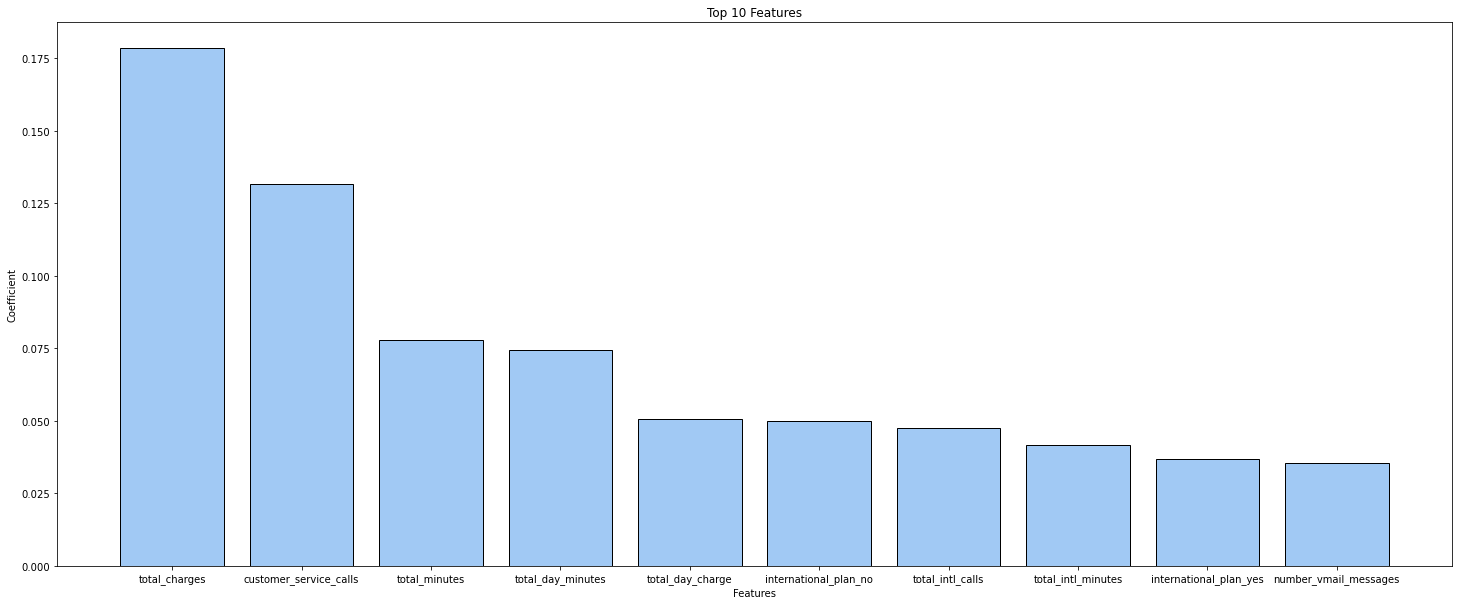

In [81]:
#hard to see all 25 features so visualizing top 10 features
fm1 = final_model.head(10)
plt.figure(figsize=(25,10))
plt.title('Top 10 Features')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.bar(fm1['Features'], fm1['coeff'], edgecolor='black')

<BarContainer object of 10 artists>

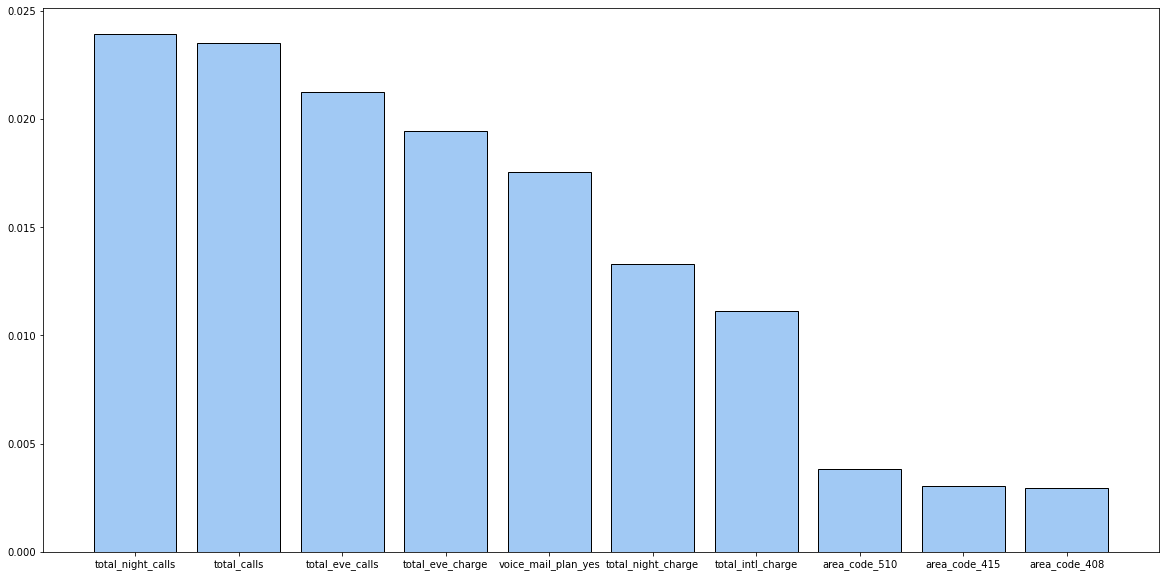

In [83]:
fm2 = final_model.tail(10)
plt.figure(figsize=(20,10))
plt.bar(fm2['Features'], fm2['coeff'], edgecolor='black')

**Total Charge** is the highest reason people churn. 
<br>
Also **Customer_Service_Calls** matters a lot too. 
<br>
It seems like **Area Code** is irrelavent. Let's see if dropping irrelavent columns could improve the model.

In [84]:
finalmodeldf = df.drop(columns = 'area_code')

In [85]:
finalmodeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   account_length          3333 non-null   int64 
 1   international_plan      3333 non-null   object
 2   voice_mail_plan         3333 non-null   object
 3   number_vmail_messages   3333 non-null   int64 
 4   total_day_minutes       3333 non-null   int32 
 5   total_day_calls         3333 non-null   int64 
 6   total_day_charge        3333 non-null   int32 
 7   total_eve_minutes       3333 non-null   int32 
 8   total_eve_calls         3333 non-null   int64 
 9   total_eve_charge        3333 non-null   int32 
 10  total_night_minutes     3333 non-null   int32 
 11  total_night_calls       3333 non-null   int64 
 12  total_night_charge      3333 non-null   int32 
 13  total_intl_minutes      3333 non-null   int32 
 14  total_intl_calls        3333 non-null   int64 
 15  tota

In [86]:
#chaging target variables as number
labelencoder = LabelEncoder()
finalmodeldf['churn'] = labelencoder.fit_transform(finalmodeldf['churn'])

#create and set features
X = finalmodeldf.drop(columns= 'churn', axis=1)
y = df['churn']

#creating dummies for categorical variables that are in the X
X = pd.get_dummies(X)
X.head()

#checking the columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   account_length          3333 non-null   int64
 1   number_vmail_messages   3333 non-null   int64
 2   total_day_minutes       3333 non-null   int32
 3   total_day_calls         3333 non-null   int64
 4   total_day_charge        3333 non-null   int32
 5   total_eve_minutes       3333 non-null   int32
 6   total_eve_calls         3333 non-null   int64
 7   total_eve_charge        3333 non-null   int32
 8   total_night_minutes     3333 non-null   int32
 9   total_night_calls       3333 non-null   int64
 10  total_night_charge      3333 non-null   int32
 11  total_intl_minutes      3333 non-null   int32
 12  total_intl_calls        3333 non-null   int64
 13  total_intl_charge       3333 non-null   int32
 14  customer_service_calls  3333 non-null   int64
 15  total_minutes        

In [87]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
#Assigning Random Forest Classifier
rfc = RandomForestClassifier()

In [89]:
#Creating Pipeline
RFC1 = Pipeline([('standardscaler', StandardScaler()), ('rfc', RandomForestClassifier())])

In [90]:
#Fitting the model
RFC1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('rfc', RandomForestClassifier())])

In [91]:
#checking on the accuracy
RFC1.score(X_test, y_test)

0.9685157421289355

In [92]:
#cross validating the score 
cross_val_score(RFC1, X, y, scoring='f1_micro')

array([0.97001499, 0.95952024, 0.97601199, 0.96696697, 0.97147147])

In [93]:
#creating prediction and scores
RFC1_Pred = RFC1.predict(X_test)
f1_score(y_test, RFC1_Pred, average='micro')

0.9685157421289355

In [94]:
print(classification_report(y_test, RFC1_Pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       566
           1       0.98      0.81      0.89       101

    accuracy                           0.97       667
   macro avg       0.97      0.90      0.93       667
weighted avg       0.97      0.97      0.97       667



Text(0.5, 1.0, 'RFC Classification')

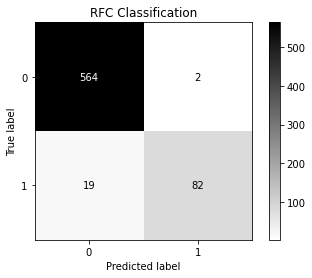

In [95]:
#creating confusion matrix
plot_confusion_matrix(RFC1, X_test, y_test, cmap='binary')
plt.title('RFC Classification')

***Evaluation of the model***
<br>
▶ Accuracy of this model is 0.9685 (96.85%)
<br>
▶ Cross validation score was 0.9745 (97.45%)
<br>
▶ f1 score was 0.9685 (96.85%)
<br>
<br>
***Confusion Matrix of Gaussian Naive Bayes***
<br>
▶ Accuracy 0.97 (TP+TN/TP+TN+FP+FN) 
<br>
▶ Precision 0.97 (TP/TP+FP)
<br>
▶ Recall 0.99 (TP/TP+FN)
<br>
▶ 0 = False(staying customers), 1 = True (leaving/churn customers)
<br>
<br>
▶ Predicted that 564(706 before) customers are staying and it is true.(True Positive)
<br>
▶ Predicted that 83 (102 before) customers are going to churn and it is true. (True Negative)
<br>
▶ Predicted that 2 (3 before) customers are staying but it is false.(False Negative)
<br>
▶ Predicted that 18 (23 before) customers are leaving but it is false. (False Positive)
<br>
<br>
Although, percentage of the accuracy, cross validation score, and f1 score didn't seem like there was a lot of improvements, on the confusion matrix, there has been changes.

## ●Results●
<br>
▶The **Random Forest Classifier model** is 96.85% accurate in classifying churn of the customer. It predicted correctly that 564 customers are staying and 83 customers are going to churn and predicted incorrectly that 2 customers are staying and 18 customers are leaving. 
<br>
<br>
▶Answering Questions:
<br>
<br>
① What is current churn rate? 
<br>
14.49% of customers are True for Churn
<br>
<br>
② What are the top 5 reasons that people are canceling?
<br>
Total Charges, Customer Service Calls, Total Day Minutes, Total Minutes, and Total Day Charge
<br>
<br>
③ What are the recommendations to improve the satisfaction?
<br>
Total Charge of the bill is one of the biggest reason that people are cancelling. Decrease charge or having an unlimited plan would help. Also customer service calls are important for customer to stay. Improve customer service call quality and find out the reason why customers are complaining and fix the issue.
<br>
<br>
④ Should the business focus on getting new customers?
<br>
14.49% churn rate is higher than I expented. 14 out of 100 customers are leaving. I would recommend satisfy the current customers first to reduce the churn rate.
<br>
<br>
⑤ Can the business predict customers who are staying and leaving?
<br>
Yes. My model predicted correctly that 564 customers are staying and 83 customers are going to churn and predicted incorrectly that 2 customers are staying and 18 customers are leaving. 

## ●Next Steps●
This dataset is too small to generallize everything. Improving the size of dataset would give the business better idea of the problems. Collect more information about the customers and see if churn rate could be improved. 